In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first

import thinkplot
import math


In [2]:
t = [1, 2, 2, 3, 5]

In [3]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1

In [4]:
from collections import Counter
counter = Counter(t)

In [5]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 3, 4, 5])
hist

Hist({1: 1, 2: 1, 3: 1, 4: 1, 5: 1})

No handlers could be found for logger "matplotlib.legend"


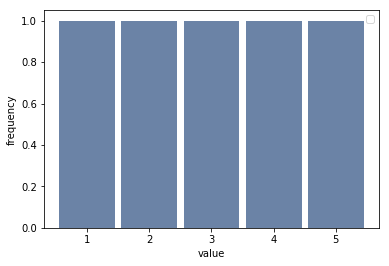

In [6]:
thinkplot.Hist(hist)
thinkplot.Show(xlabel='value', ylabel='frequency')

In [7]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

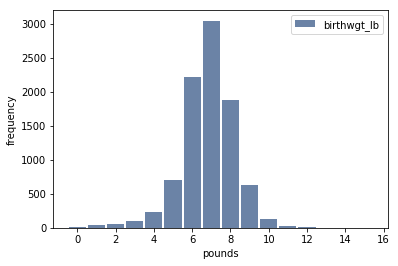

In [8]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency')

#When the argument passed to Hist is a pandas Series, any nan values are dropped

# 2.3 Mother's age at end of pregnancy

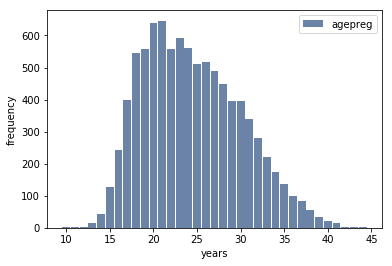

In [9]:
#transform age values into integer
#ages will always be rounded down
ages = np.floor(live.agepreg)

#create hist plot
hist23 = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist23)
thinkplot.Show(xlabel='years', ylabel='frequency')

# 2.4 Pregnancy length in weeks

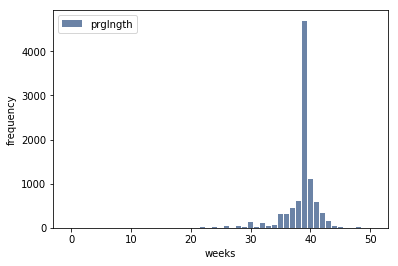

In [10]:
hist24 = thinkstats2.Hist(live.prglngth, label='prglngth')
thinkplot.Hist(hist24)
thinkplot.Show(xlabel='weeks', ylabel='frequency')


In [11]:
'''
lets find outliers by counting the number of live births, 
with less than 10 weeks of pregnancy.
This is most likely a recording error, babies can't survive only 10 weeks of pregnancy.
'''
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0.0 8
1.0 40
2.0 53
3.0 98
4.0 229
5.0 697
6.0 2223
7.0 3049
8.0 1889
9.0 623


# 2.6 First babies

Here we will focus on pregnancies longer than 27 weeks

In [12]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]


In [13]:
first_hist = thinkstats2.Hist(firsts.prglngth)
other_hist = thinkstats2.Hist(others.prglngth)


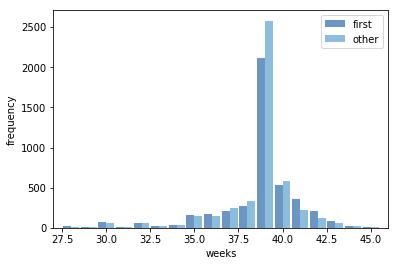

In [14]:
#let's plot them on the same axis
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width, label='first')
thinkplot.Hist(other_hist, align='left', width=width, label='other')
thinkplot.Show(xlabel='weeks', ylabel='frequency', 
               xlim=[27, 46])


# 2.8 Variance

In [15]:
mean = live.prglngth.mean()
print(mean)
var = live.prglngth.var()
print(var)
std = live.prglngth.std()
print(std)

38.5605596852
7.30266206783
2.70234381007


# 2.9 Effect Size


In [16]:
# code to compute Cohen's d
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_var= (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [17]:
CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883

# 2.11 Exercises

#Ex 2.1
To summarize what I discovered about whether first babies arrive late, I would use more than one summary statistics.
First I would print the mean for the pregnancy length of each group (fists and others).
Than, I would compare both means, using cohen d. This would help me to understand the if the pregnancy time is really different, and if it poses any effect.

#Ex 2.4

In [21]:
first_wgt = firsts.totalwgt_lb
other_wgt = others.totalwgt_lb

In [31]:
first_wgt.describe()

count    4363.000000
mean        7.201094
std         1.420573
min         0.125000
25%         6.437500
50%         7.312500
75%         8.000000
max        15.437500
Name: totalwgt_lb, dtype: float64

In [26]:
other_wgt.describe()

count    4675.000000
mean        7.325856
std         1.394195
min         0.562500
25%         6.500000
50%         7.375000
75%         8.187500
max        14.000000
Name: totalwgt_lb, dtype: float64

In [29]:
CohenEffectSize(first_wgt, other_wgt)

-0.088672927072602